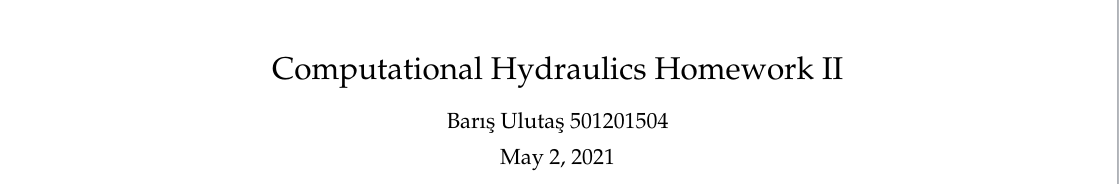

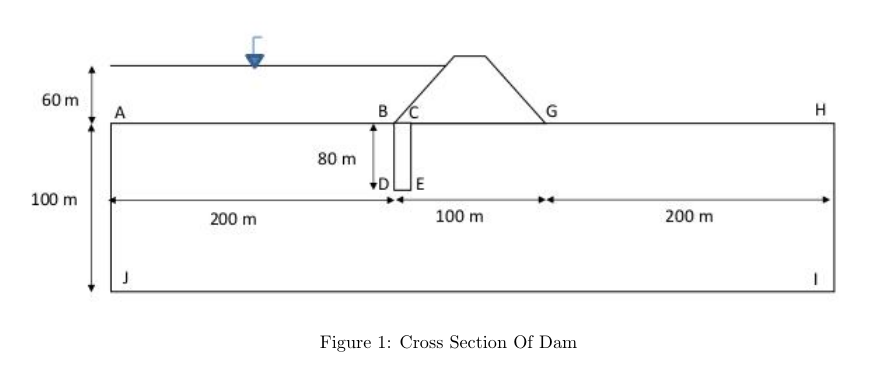

 According to the cross section which is shown in Figure 1, the seepage under the dam was examined. Potential function values and velocities of the water flow under the dam were calculated considering the boundary and initial conditions. Potential values matrix is calculated by Laplace equation. Laplace equation is numerically calculated using the finite difference method in this python notebook. The codes written have been uploaded to the Github repository.
By clicking on the given link, the codes written can be viewed and edited in the web browser: 
https://mybinder.org/v2/gh/bulutas/Myfiles.git/HEAD

In [ ]:
#Necessary Libraries installed
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
# Set the grid size
dx1 = 10
dy1 = 10
#Length of x and y axes
xl = 500
yl = 100
# Create a function to get psi field
def get_num_psi(dx):
    # get the grid point number
    jmax = int(xl/dx)+1
    imax = int(yl/dx)+1
    # Initialise the mesh with zeros
    psi = np.zeros((imax, jmax))
    #Boundary conditions
    #Only the places with 1 are entered, the remaining places are default 0
    psi[:, 0] = 1 
    psi[0,0:20]=1
    atol, iteration, sum_resid = 1e-9, 0, 1
    a, b, c, d, e = 0.01, 0.01, 0.01, 0.01, -0.04
    while sum_resid > atol:
        psi_in = psi[1:imax-1, 1:jmax-1]
        ij_field = np.fromfunction(lambda i, j: i+j, psi_in.shape)
        io, jo = np.where(ij_field%2 == iteration%2)
        i, j = io+1, jo+1
        cnt = len(i)
        resid = np.zeros(psi.shape)
        resid[i, j] = a*psi[i+1, j]+b*psi[i-1,j]+c*psi[i,j+1]+d*psi[i,j-1]+e*psi[i,j]
        psi[i, j] = psi[i, j]-resid[i, j]/e
        resid_m = np.sum(np.abs(resid))
        sum_resid = (sum_resid+resid_m)/cnt
        iteration += 1
        
    return psi
psi1=get_num_psi(10)

Potential values calculated with FDM in the created Psi matrix are shown in the colormap below.

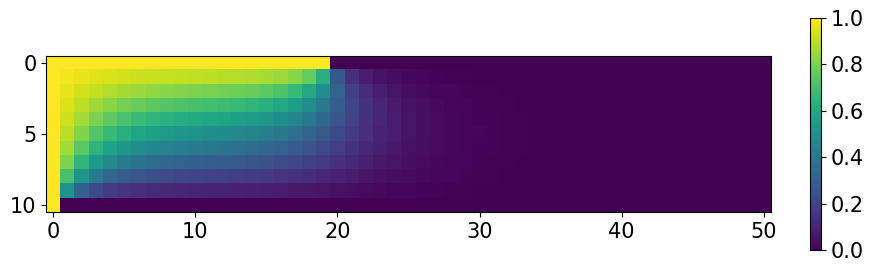

In [ ]:
plt.figure(figsize=(10, 5), dpi=100)
plt.rcParams.update({'font.size': 15})
im=plt.imshow(psi1)
plt.colorbar(im,fraction=0.015, pad=0.05)
plt.savefig("potential.pdf")


potential function is plotted as follows:

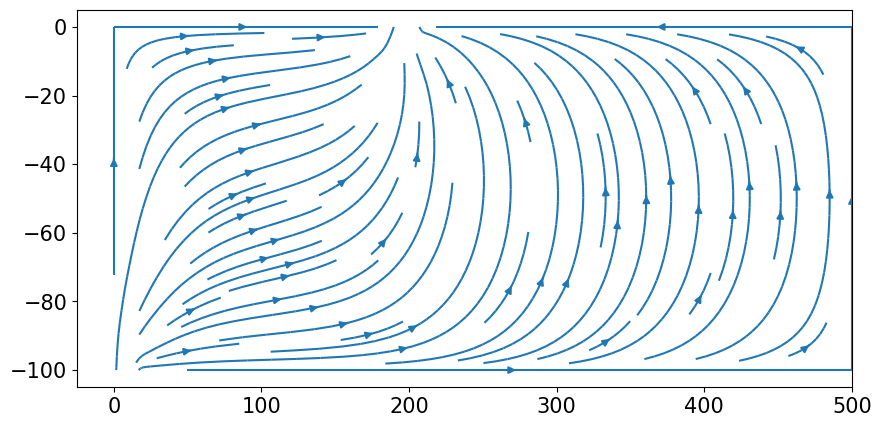

In [ ]:

plt.figure(figsize=(10, 5), dpi=100)
plt.rcParams.update({'font.size': 15})
u, v = np.gradient(psi1)
x=np.linspace(0,500,51)
y=np.linspace(0,-100,11)
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y, -u, -v)
plt.savefig("stream.pdf")

To compare the codes written for the potential function, a new function has been received and implemented for the stream function from GIThub. Stream function is plotted as follows according to given boundary conditions

In [16]:
# Boundary conditions for stream function
psi1[0, 0:20] = psi1[1, 0:20] #AB Boundary
psi1[:, 0] = psi1[:, 1] #AJ Boundary
psi1[0, 20:-1] = psi1[1, 20:-1] #GH Boundary
psi1[:, -1] = psi1[:, -2] #HI Boundary
psi1[-1, :] = 0 #JI Boundary
psi1[0:8,20] = 1
p = laplace2d(p, y, dx, dy, 1e-4)


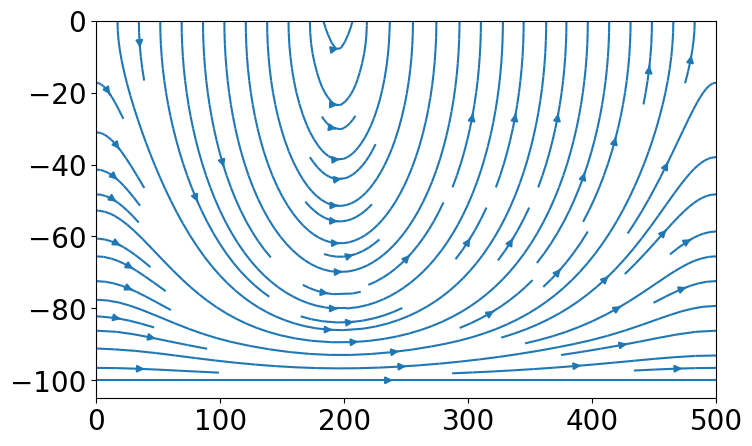

In [21]:
# Laplace Equation is defined. Taken From GİTHUB Repo.

def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
            
        p[0, 0:20] = 1 #AB Boundary
        p[:, 0] = 1 #AJ Boundary
        p[0, 20:-1] = 0 #GH Boundary
        p[:, -1] = 0 #HI Boundary
        p[-1, :] = p[-2, :] #JI Boundary
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
     
    return p
# Variables, initial and boundary conditions are defined. The wall in the question is not defined.

##variable declarations
nx = 51
ny = 11
c = 1
dx = 10
dy = 10


##initial conditions
p = np.zeros((ny, nx))  # create a XxY vector of 0's


##plotting aids
x = np.linspace(0, 500, nx)
y = np.linspace(0, 100, ny)

##boundary conditions
p[0, 0:20] = 1 #AB Boundary
p[:, 0] = 1 #AJ Boundary
p[0, 30:-1] = 0 #GH Boundary
p[:, -1] = 0 #HI Boundary
p[-1, :] = p[-2, :] #JI Boundary
p = laplace2d(p, y, dx, dy, 1e-4)
# Stream function is plotted.


plt.figure(figsize=(8, 5), dpi=100)
plt.rcParams.update({'font.size': 20})
u, v = np.gradient(p)
x=np.linspace(0,500,51)
y=np.linspace(0,-100,11)
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y, -v, u)